# CSM148 Project 3

## 1. Loading Data and Analysis

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

In [82]:
raw_data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

#identify 'Unknown' smoking and 'Other' gender values as Null values
raw_data['gender'] = raw_data['gender'].replace({'Other': None})
raw_data['smoking_status'] = raw_data['smoking_status'].replace({'Unknown':None})

raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [83]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [84]:
#since ever_married is a binary yes/no column with no missing values, we can easily convert this to numerical values
raw_data['ever_married'] = raw_data['ever_married'].replace({"Yes":1, "No":0})

#and since gender has only 1 value of the kind "Other", we can drop that row and convert it to a binary value as well.
raw_data = raw_data[raw_data['gender'].notna()]
raw_data['gender'] = raw_data['gender'].replace({'Male':1, 'Female':0})

#Since Residence_type is also a variable with two values we can convert this to binary as well
raw_data['Residence_type'] = raw_data['Residence_type'].replace({'Urban':1, 'Rural':0})

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     3565 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 518.9+ KB


In [85]:
raw_data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,0.413975,43.229986,0.097475,0.054022,0.656293,0.508123,106.140399,28.89456,0.048738
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,0.499983,45.285004,7.85432,0.215340
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.10000,0.000000
75%,54643.000000,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,33.10000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.60000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadddfa2250>,
      dtype=object)

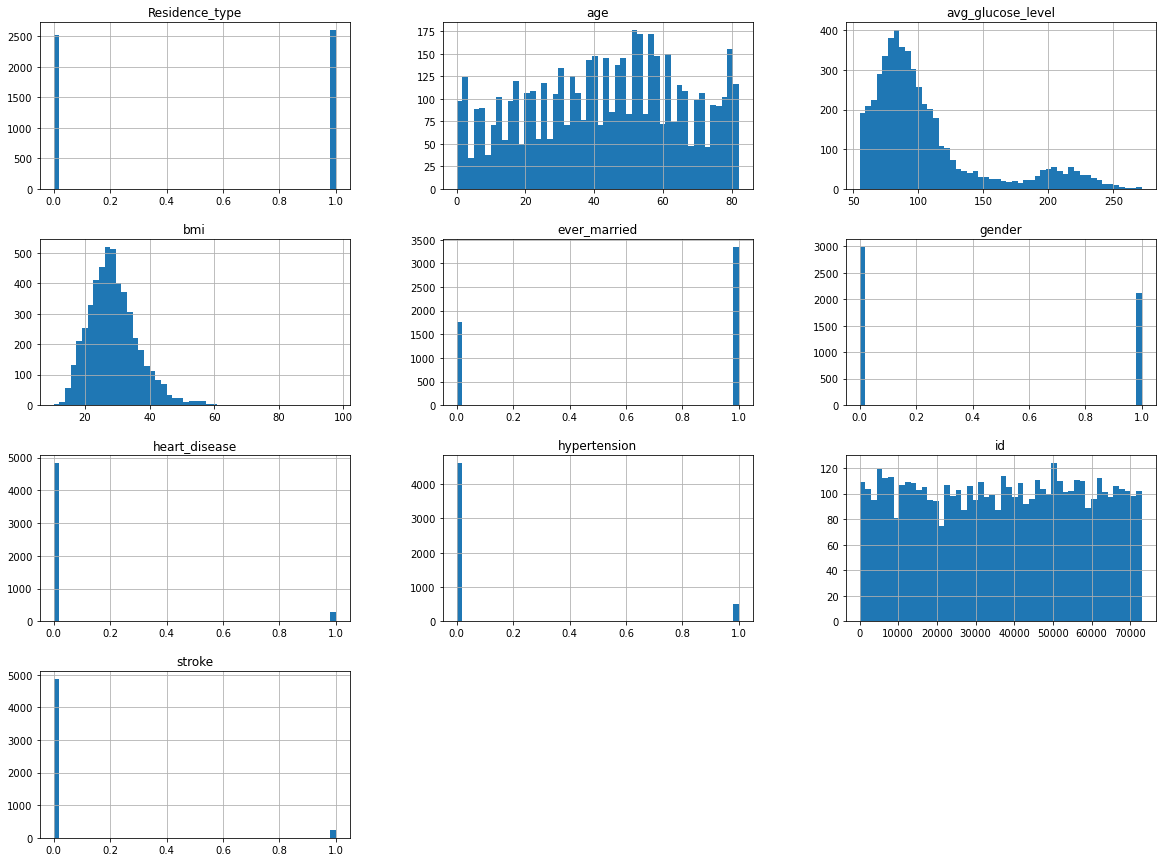

In [86]:
raw_data.hist(bins=50,figsize=(20,15))

Its interesting to note here that the dataset is imbalanced, with a huge majority of datapoints labeled negative for a stroke rather than positive. 

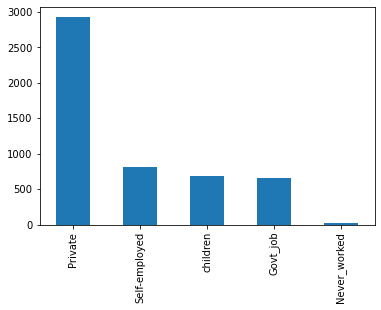

In [87]:
raw_data['work_type'].value_counts().plot.bar()

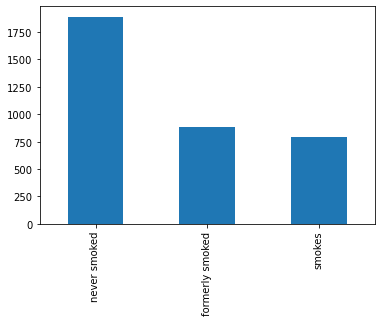

In [88]:
raw_data['smoking_status'].value_counts().plot.bar()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     3565 non-null   float64
 10  stroke             5109 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 479.0 KB


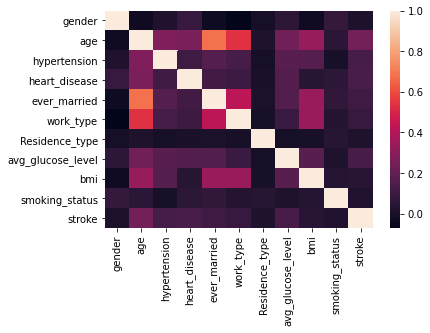

In [89]:
#in order to consider categorical variables for the correlation matrix we can temporarily bin them into numerical categories
corr_data = raw_data.drop(columns=['id'])
corr_data['work_type'] = corr_data['work_type'].replace({'children':0,'Govt_job':1,'Never_worked':2,'Private':3,'Self-employed':4})
corr_data['smoking_status'] = corr_data['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'smokes': 2})

corr_data.info()
corr_mat = corr_data.corr()
sns.heatmap(corr_mat)

It's interesting to see here that a majority of our values are not heavily correlated with each other. The lack of correlation of a single factor to stroke may also be because of the dataset imbalance. Age and ever_married are understandingly correlated to an extent, as well as age and work_type. However, the second is less reliable because it is not appropriately encoded yet. 

## 2. Data Augmentation, Processing and Pipelining

In [90]:
#since id is just a random identifier, it is irrelevant to our dataset
processed_data = raw_data.drop(columns=['id'])

#since smoking_status has a number of null-values, we are forced to drop rows with those values, since there is no logical way to impute a value for these data points without introducing bias
processed_data = processed_data[processed_data['smoking_status'].notna()]

#since undersampling bmi does not reduce the size of the dataset further by much, it may be the best idea to impute this feature by dropping rows in order to not introduce bias.
processed_data = processed_data[processed_data['bmi'].notna()]

In [91]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   int64  
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   int64  
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   int64  
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 321.1+ KB


Since bad health at a high age is a particular risk for health disorders, it may be relevant to perform a feature cross between indicators of bad health and age.

In [92]:
#Data Augmentation 1

#Feature Cross Age and BMI:
processed_data['bmi_age'] = processed_data['bmi']*processed_data['age']

In [93]:
#Data Augmentation 2

#Feature Cross Age and Average Glucose Level:
processed_data['glucose_age'] = processed_data['avg_glucose_level']*processed_data['age']

In [94]:
labels = processed_data['stroke']
processed_data.drop(columns=['stroke'], inplace=True)
processed_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_age,glucose_age
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,2452.2,15322.23
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,2600.0,8473.60
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1685.6,8390.27
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1896.0,13755.48
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,2349.0,15083.01


It would also be interesting to see how our models do when treating smoking_status as an ordinal variable, instead of one-hot encoding it. Therefore, it may be worth testing our models with smoking_status treated in both those ways.

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_features = ['age','avg_glucose_level','bmi','bmi_age','glucose_age']
categorical_features = processed_data.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X = processed_data

#chose this method of pipelining, to keep column names after transforms
for c in categorical_features:
    X = pd.concat([X,pd.get_dummies(X[c], prefix=c)],axis=1)
    X.drop(columns=[c], inplace=True)

X[numerical_features] = scaler.fit_transform(X[numerical_features])

y = labels
column_labels = X.columns

X.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,bmi_age,glucose_age,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.973480,0,1,1,1,2.523666,0.864688,1.455755,2.575993,0,0,1,0,0,1,0,0
2,1,1.663236,0,1,1,0,-0.050140,0.302637,1.678144,0.783513,0,0,1,0,0,0,1,0
3,0,0.018435,0,0,1,1,1.319048,0.563100,0.302279,0.761704,0,0,1,0,0,0,0,1
4,0,1.610178,1,0,1,0,1.379636,-0.862591,0.618861,2.165930,0,0,0,1,0,0,1,0
5,1,1.716294,0,0,1,1,1.633096,-0.177163,1.300474,2.513382,0,0,1,0,0,1,0,0


In [96]:
from sklearn.model_selection import train_test_split

#create train test split for models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)


In [97]:
#verify that both splits contain an identical proportion of class labels.
train_unique, train_counts = np.unique(y_train, return_counts=True)
train_prop = dict(zip(train_unique, train_counts))

test_unique, test_counts = np.unique(y_test, return_counts=True)
test_prop = dict(zip(test_unique, test_counts))

print('train label counts: ', train_prop)
print('train label proportion: ', train_prop[1]/(train_prop[0]+train_prop[1]))
print('test label counts: ', test_prop)
print('test label proportion: ', test_prop[1]/(test_prop[0]+test_prop[1]))

train label counts:  {0: 2596, 1: 144}
train label proportion:  0.052554744525547446
test label counts:  {0: 649, 1: 36}
test label proportion:  0.052554744525547446


### Balancing The Train Data

In [98]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=42)
X_train_bal, y_train_bal = oversampler.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_bal, return_counts=True)
prop = dict(zip(unique, counts))

print('balanced label counts: ', prop)
print('balanced label proportion: ', prop[1]/(prop[0]+prop[1]))



balanced label counts:  {0: 2596, 1: 2596}
balanced label proportion:  0.5


## 3. Error Scores Helper

In [99]:
from sklearn import metrics
import matplotlib.pyplot as plt

def test_classifier(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("Precision: ", metrics.precision_score(y_test, y_pred))
    print("Recall: ", metrics.recall_score(y_test, y_pred))
    print("F1 Score: ", metrics.f1_score(y_test, y_pred))
    metrics.plot_confusion_matrix(clf, X_test, y_test)
    

## 4. Logistic Regression

Feature: gender , Score: -0.87790
Feature: age , Score: 1.32454
Feature: hypertension , Score: -0.59066
Feature: heart_disease , Score: -0.53216
Feature: ever_married , Score: -0.40955
Feature: Residence_type , Score: -0.34610
Feature: avg_glucose_level , Score: -0.03104
Feature: bmi , Score: -0.25182
Feature: bmi_age , Score: 0.48149
Feature: glucose_age , Score: 0.36483
Feature: work_type_Govt_job , Score: -4.25909
Feature: work_type_Never_worked , Score: -1.08375
Feature: work_type_Private , Score: -3.05537
Feature: work_type_Self-employed , Score: -4.10350
Feature: work_type_children , Score: -1.87241
Feature: smoking_status_formerly smoked , Score: -3.56335
Feature: smoking_status_never smoked , Score: -3.80393
Feature: smoking_status_smokes , Score: -3.57439


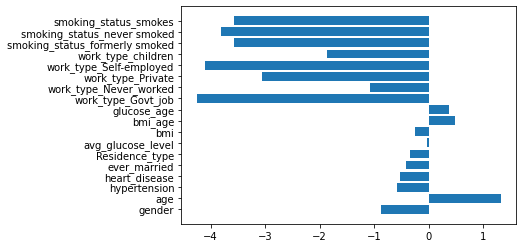

train scores:
Accuracy:  0.825115562403698
Precision:  0.8204252088078967
Recall:  0.8324345146379045
F1 Score:  0.8263862332695984


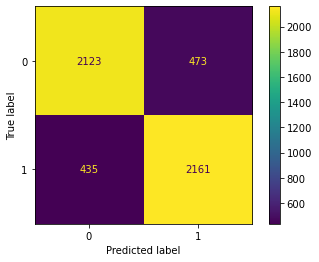

test scores:
Accuracy:  0.7970802919708029
Precision:  0.13986013986013987
Recall:  0.5555555555555556
F1 Score:  0.223463687150838


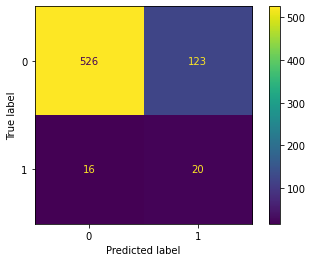

In [104]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42).fit(X_train_bal, y_train_bal)

# get importance
importance = log_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature:',column_labels[i],', Score: %.5f' % (v))
# plot feature importance
plt.barh(column_labels, importance)
plt.show()

print('train scores:')
test_classifier(log_clf, X_train_bal, y_train_bal)
plt.show()
print('test scores:')
test_classifier(log_clf, X_test, y_test)
plt.show()